In [294]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [295]:
# Function to load the dataset
def importdata():
    df = pd.read_csv(r"C:\Users\Admin\Downloads\gender_classification_v7.csv")
    
    #heat map for co relation
    sns.heatmap(df.corr(numeric_only=True), annot=True)
    
    # Scatter plot for original data
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df, x='forehead_width_cm', y='forehead_height_cm', hue='gender')
    plt.title("Males & Females")
    plt.xlabel("forehead_width_cm")
    plt.ylabel("forehead_height_cm")
    plt.show()

    return df


In [296]:
# Function to split the dataset/feature creation
def splitdataset(df):
    
    X =df.drop(["gender"],axis = 1)
    Y = df.gender.values
    
    df.gender = [1 if i == "Male" else 0 for i in df.gender]
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=10, test_size=0.15)
    return X_train, X_test, y_train, y_test

In [297]:
# Function to train and evaluate Logistic Regression
def logistic_regression(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)
   
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    return accuracy, cm, cr

In [298]:
# Function to train and evaluate Naive Bayes
def naive_bayes(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = GaussianNB()
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    return accuracy, cm, cr

In [299]:

# Function to train and evaluate K-Nearest Neighbors (KNN)
def knn(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    return accuracy, cm, cr

In [300]:
#Function to train and evaluate Decision Tree
def decision_tree(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Gini
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=3, min_samples_leaf=5)
    clf_gini.fit(X_train_scaled, y_train)
    
    y_pred_gini = clf_gini.predict(X_test_scaled)
    
    accuracy_gini = accuracy_score(y_test, y_pred_gini) * 100
    cm_gini = confusion_matrix(y_test, y_pred_gini)
    cr_gini = classification_report(y_test, y_pred_gini)

    # Entropy
    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=10, max_depth=3, min_samples_leaf=5)
    clf_entropy.fit(X_train_scaled, y_train)
    
    y_pred_entropy = clf_entropy.predict(X_test_scaled)
    
    accuracy_entropy = accuracy_score(y_test, y_pred_entropy) * 100
    cm_entropy = confusion_matrix(y_test, y_pred_entropy)
    cr_entropy = classification_report(y_test, y_pred_entropy)

    return accuracy_gini, cm_gini, cr_gini, accuracy_entropy, cm_entropy, cr_entropy


In [301]:

# Function to train and evaluate Random Forest
def random_forest(X_train, X_test, y_train, y_test):
    
    model = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=10)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    return accuracy, cm, cr


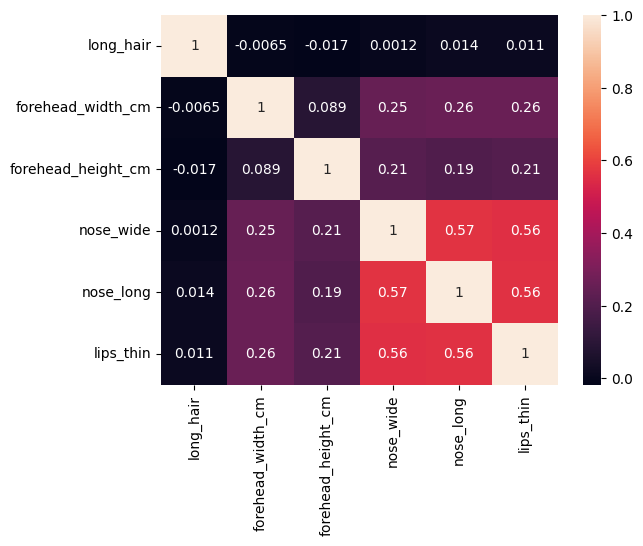

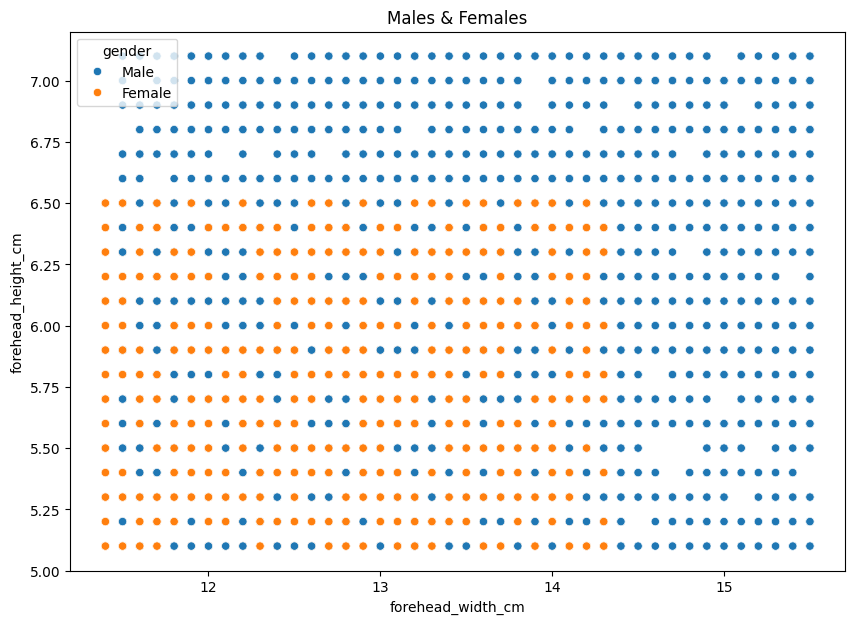

X_train :  (4250, 6)
X_test :  (751, 6)
y_train :  (4250,)
y_test :  (751,)

--------------------------------------------------------

Logistic Regression:

Confusion Matrix:
[[367  13]
 [ 11 360]]

Accuracu score:
96.80426098535287

Classification Report:
              precision    recall  f1-score   support

      Female       0.97      0.97      0.97       380
        Male       0.97      0.97      0.97       371

    accuracy                           0.97       751
   macro avg       0.97      0.97      0.97       751
weighted avg       0.97      0.97      0.97       751


--------------------------------------------------------

Naive Bayes:

Confusion Matrix:
[[367  13]
 [ 12 359]]

Accuracu score:
96.6711051930759

Classification Report:
              precision    recall  f1-score   support

      Female       0.97      0.97      0.97       380
        Male       0.97      0.97      0.97       371

    accuracy                           0.97       751
   macro avg       0.97   

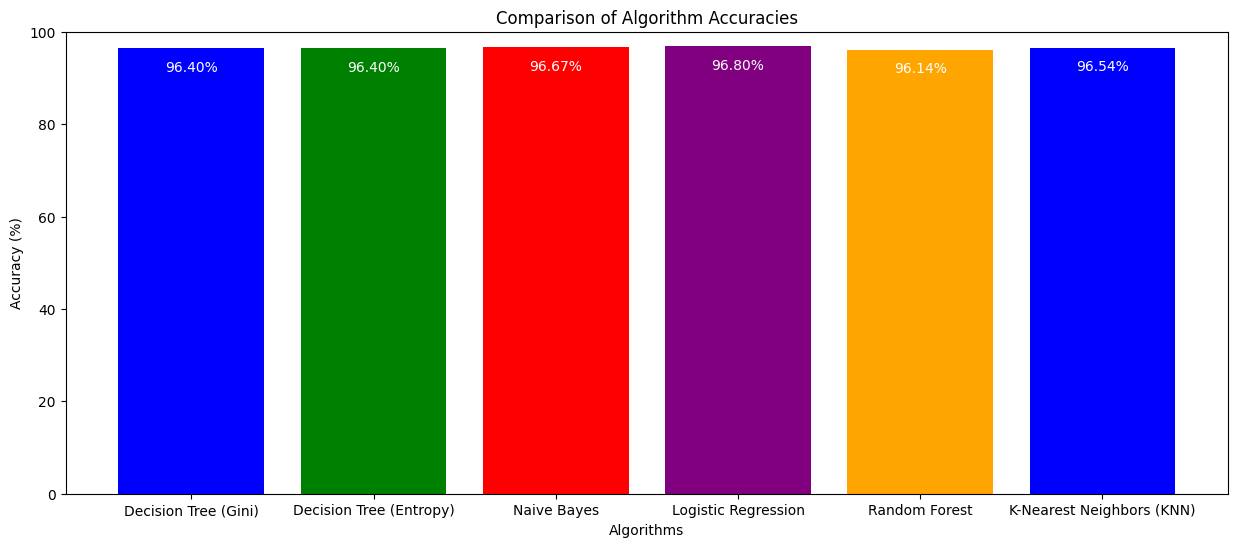

In [302]:
# Main function to run all models and plot the results
def driver():
    
    data = importdata()
    X_train, X_test, y_train, y_test = splitdataset(data)
    
    # Logistic Regression
    lr_accuracy, lr_cm, lr_cr = logistic_regression(X_train, X_test, y_train, y_test)
    
    # Naive Bayes
    nb_accuracy, nb_cm, nb_cr = naive_bayes(X_train, X_test, y_train, y_test)
    
    # K-Nearest Neighbors (KNN)
    knn_accuracy, knn_cm, knn_cr = knn(X_train, X_test, y_train, y_test)
    
    # Decision Tree
    gini_accuracy, gini_cm, gini_cr, entropy_accuracy, entropy_cm, entropy_cr = decision_tree(X_train, X_test, y_train, y_test)
    
    # Random Forest
    rf_accuracy, rf_cm, rf_cr = random_forest(X_train, X_test, y_train, y_test)
    
    # Collecting accuracy scores for plotting
    algorithms = ['Decision Tree (Gini)', 'Decision Tree (Entropy)', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'K-Nearest Neighbors (KNN)']
    accuracies = [gini_accuracy, entropy_accuracy, nb_accuracy, lr_accuracy, rf_accuracy, knn_accuracy]

    #printing training and testing input values
    print('X_train : ',X_train.shape)
    print('X_test : ',X_test.shape)
    print('y_train : ',y_train.shape)
    print('y_test : ',y_test.shape)
    print("\n--------------------------------------------------------\n")
      
    # Printing confusion matrices ,accuracy and classification reports
    print("Logistic Regression:\n")
    print("Confusion Matrix:")
    print(lr_cm)
    print("\nAccuracu score:")
    print(lr_accuracy)
    print("\nClassification Report:")
    print(lr_cr)
    print("\n--------------------------------------------------------\n")

    print("Naive Bayes:\n")
    print("Confusion Matrix:")
    print(nb_cm)
    print("\nAccuracu score:")
    print(nb_accuracy)
    print("\nClassification Report:")
    print(nb_cr)
    print("\n--------------------------------------------------------\n")
 
    print("K-Nearest Neighbors (KNN):\n")
    print("Confusion Matrix:")
    print(knn_cm)
    print("\nAccuracu score:")
    print(knn_accuracy)
    print("\nClassification Report:")
    print(knn_cr)
    print("\n--------------------------------------------------------\n")

    print("Decision Tree (Gini):\n")
    print("Confusion Matrix:")
    print(gini_cm)
    print("\nAccuracu score:")
    print(gini_accuracy)
    print("\nClassification Report:")
    print(gini_cr)
    print("\n--------------------------------------------------------\n")

    print("Decision Tree (Entropy):\n")
    print("Confusion Matrix:")
    print(entropy_cm)
    print("\nAccuracu score:")
    print(entropy_accuracy)
    print("\nClassification Report:")
    print(entropy_cr)
    print("\n--------------------------------------------------------\n")
    
    print("Random Forest:\n")
    print("Confusion Matrix:")
    print(rf_cm)
    print("\nAccuracu score:")
    print(rf_accuracy)
    print("\nClassification Report:")
    print(rf_cr)
    print("\n--------------------------------------------------------\n")
        
    # Plotting the bar chart for accuracies
    plt.figure(figsize=(15, 6))
    bars = plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel('Algorithms')
    plt.ylabel('Accuracy (%)')
    plt.title('Comparison of Algorithm Accuracies')
    plt.ylim(0, 100)
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{acc:.2f}%', ha='center', color='white', fontsize=10)
    plt.show()
    
if __name__ == "__main__":
    driver()
